# Assignment 7: Recog Task Plots
## Computational Methods in Psychology (and Neuroscience)
### Psychology 4500/7559 --- Fall 2020


# Objectives

Upon completion of this assignment, students will have:

1. Read in all the recognition memory data
2. Performed some simple data clean-up (code provided)
3. Plotted general recognition results

# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A06_Recog_Plots_mst3k).


## Details

Below is code that will load in the data from the two recognition memory experiments. As long as you have updated this repository from GitHub and unzipped the `all_data.zip` file in the `lessons` directory, the code should work unchanged to load in the data, create two data frames, and perform some minor clean-up of the data.

Your task is to make some plots that explore some initial questions about the data (we'll perform some statistical tests on the data next week, taking a deeper dive into how to analyze recognition memory experiments.)

For each of the two tasks (i.e., you will be generating two total figures), you will be plotting performance as a function of type (e.g., indoor/outdoor or valence), split out by condition (mixed or pure). These plots must have within-subject corrected error bars that you calculate making use of the `ci_within` function.

Be sure to refer to the class notebooks to help guide how to do all the steps above. We have some code below to help you get started, along with demonstrations of approximately what the figures will look like when done.

* ***When you are done, save this notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on UVACollab.***  

## General Imports

In [7]:
import numpy as np
from scipy import stats
import pandas as pd
from glob import glob
import os

from smile.log import log2dl

from ci_within import ci_within

## Custom SLOG loading function

In [8]:
# custom function to load slogs
def load_all_subj_logs(task_dir, log_file):
    # load in a list of all the subj
    subjs = [os.path.split(subj_dir)[-1] 
             for subj_dir in glob(os.path.join(task_dir, 's*'))]
    subjs.sort()

    # loop over subj and their data
    all_dat = []
    for subj in subjs:
        # set the file
        log_path = os.path.join(task_dir, subj, log_file)
        #print(log_path)

        # load the data
        all_dat.extend(log2dl(log_path, subj=subj))

    df = pd.DataFrame(all_dat)
    
    return df

## Load in all the data

In [49]:
# load the data from each task
task_dir = os.path.join('..', 'lessons', 'data2', 'Taskapalooza')

df_i = load_all_subj_logs(task_dir, 'log_image_test')
df_w = load_all_subj_logs(task_dir, 'log_word_test')
df_i.head()

,resp_map_lure,resp_map_target,block_num,trial_num,stim_on_time,stim_on_error,resp,resp_time_time,resp_time_error,rt,correct,log_time,filename,in_out,novelty,cond,subj,log_num
0,F,J,0,0,2361.470167,0.0,F,2362.502265,0.000391,1.032098,True,2363.385215,out2646.jpg,outdoor,lure,outdoor,s001,0
1,F,J,0,1,2363.392059,0.0,J,2363.993073,0.001033,0.601014,True,2364.559602,out0031_new.jpg,outdoor,target,outdoor,s001,0
2,F,J,0,2,2364.572868,0.0,F,2365.363671,0.000197,0.790803,True,2365.870152,out1227.jpg,outdoor,lure,outdoor,s001,0
3,F,J,0,3,2365.874493,0.0,F,2366.714544,0.000191,0.840051,True,2367.588254,out0134_new.jpg,outdoor,lure,outdoor,s001,0
4,F,J,0,4,2367.592558,0.0,F,2368.463209,0.000248,0.870651,True,2369.152451,out2086.jpg,outdoor,lure,outdoor,s001,0


## Some data clean-up

In [50]:
# it turns out the cond is easier to visualize as pure and mixed
def fix_conds(df, type_col):
    # loop over the unique subjects
    usubj = df.subj.unique()
    for s in usubj:
        # loop over their blocks
        ublocks = df.loc[df['subj']==s, 'block_num'].unique()
        for b in ublocks:
            # grab the data for that subj and block
            dfb = df.loc[(df['subj']==s)&(df['block_num']==b)]
            
            # get the unique types in that block
            uval = dfb[type_col].unique()
            if len(uval) > 1:
                # it's mixed
                df.loc[(df['subj']==s)&(df.block_num==b), 'cond'] = 'mixed'
            else:
                # it's the pure
                df.loc[(df['subj']==s)&(df.block_num==b), 'cond'] = 'pure'

# fix the conds in the recog experiments (updated in place)
fix_conds(df_i, type_col='in_out')
fix_conds(df_w, type_col='valence')


# add in log_rt columns
df_i['log_rt'] = np.log(df_i['rt'])
df_w['log_rt'] = np.log(df_w['rt'])

# must make correct an int
df_i['correct'] = df_i['correct'].astype(np.int)
df_w['correct'] = df_w['correct'].astype(np.int)


# Image Recognition Figure

Replace sections marked with `XXX` with the proper code to generate and plot the correct data.

You are making a plot of recognition performance as a function of location (indoor vs. outdoor), grouped by condition (mixed vs. pure).

In [63]:
# get the error corrected by condition and whether they got it correct
res = ci_within(df_i,  
                indexvar='subj',       # column that identifies a subject
                withinvars=['cond','in_out'],     # list of columns for grouping within subject
                measvar='correct')        # dependent variable averaging over
res

mean       std       sem        ci     len
cond  in_out                                                 
mixed indoor   0.823671  0.419673  0.010313  0.020228  1656.0
      outdoor  0.800725  0.445828  0.010956  0.021488  1656.0
pure  indoor   0.826087  0.430897  0.007487  0.014680  3312.0
      outdoor  0.775060  0.470916  0.008183  0.016044  3312.0

In [64]:
# must unstack and reset index to plot properly
res.unstack().reset_index()

cond      mean                 std                 sem            \
in_out           indoor   outdoor    indoor   outdoor    indoor   outdoor   
0       mixed  0.823671  0.800725  0.419673  0.445828  0.010313  0.010956   
1        pure  0.826087  0.775060  0.430897  0.470916  0.007487  0.008183   

              ci               len          
in_out    indoor   outdoor  indoor outdoor  
0       0.020228  0.021488  1656.0  1656.0  
1       0.014680  0.016044  3312.0  3312.0

Text(0, 0.5, 'Performance')

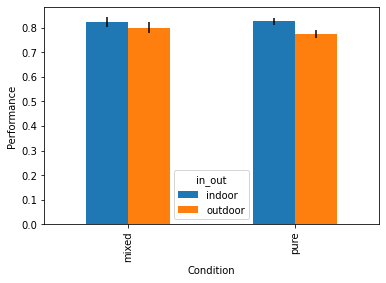

In [65]:
# plot the results
ax = res.unstack().reset_index().plot(x='cond', y='mean', yerr='ci', kind="bar")
#ax.get_legend().remove()
ax.set_xlabel('Condition')
ax.set_ylabel('Performance')

# Word Recognition Figure

Replace the sections marked with `XXX` to generate and plot the correct data.

You are plotting recognition performance as a function of valence (negative, neutral, positive), grouped by condition (mixed vs. pure).

Text(0, 0.5, 'Performance')

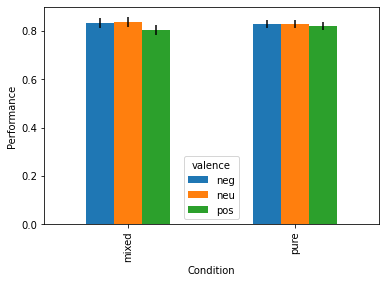

In [61]:
# get the error corrected by condition and whether they got it correct
res = ci_within(df_w, 
                indexvar='subj',       # column that identifies a subject
                withinvars=['cond','valence'],     # list of columns for grouping within subject
                measvar='correct')        # dependent variable averaging over

# generate the plot
ax = res.unstack().reset_index().plot(x='cond', y='mean', yerr='ci', kind="bar")
ax.set_xlabel('Condition')
ax.set_ylabel('Performance')